In [76]:
import numpy as np # Required for math operations
import pandas as pd # Important for reading data as can be seen from line 11
import matplotlib.pyplot as plt # Important for plotting graphs and figures
import seaborn as sns # From the given examples of hw1 , I found that the seaborn library makes plotting easier compared to matplotlib
from sklearn.model_selection import train_test_split # Allows us to split our data into test and train in ratio we adjust
from sklearn.preprocessing import StandardScaler # Scaling is important for calculating distance therefore I imported this function
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Allows us to plot confusion matrix and classification reports
import knn  # Importing only knn_predict function caused errors therefore I imported whole library

In [78]:
# Loading data by using pandas library 
wine_data = pd.read_csv("wine.data", header=None)
wine_data.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', #
                     'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',  # These features were given in wine.data file
                     'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']       #


In [80]:
X = wine_data.iloc[:, 1:] # I separated wine class and features into two parameters
Y = wine_data.iloc[:, 0]  # Class column is separated from the features columns

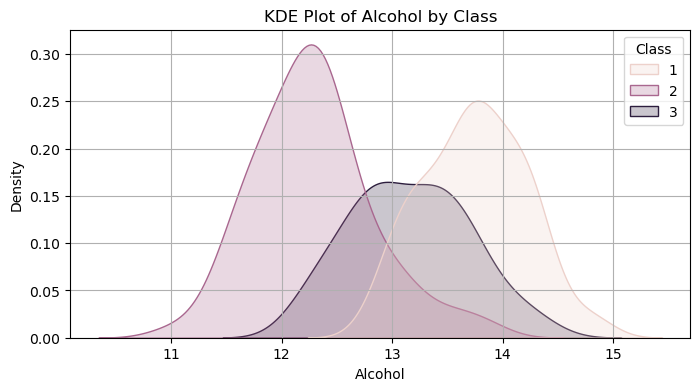

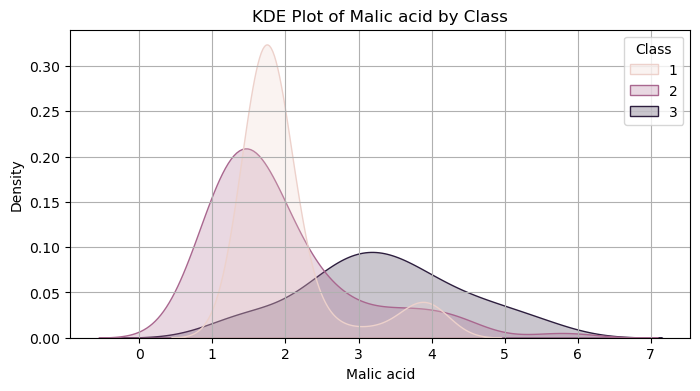

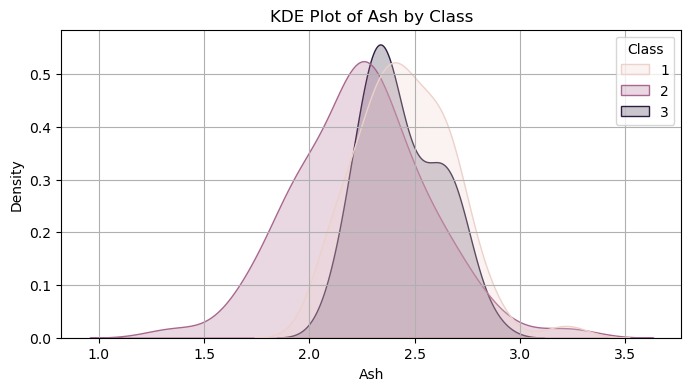

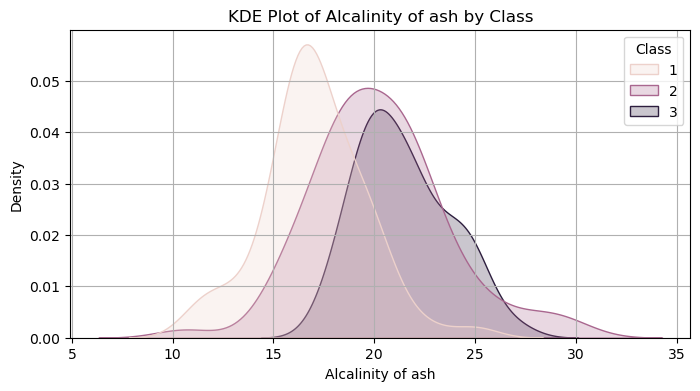

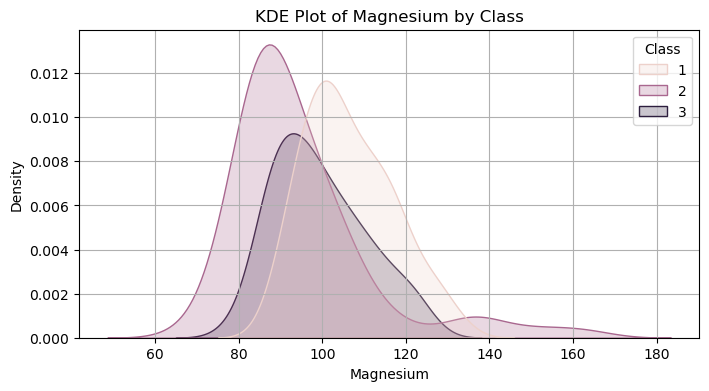

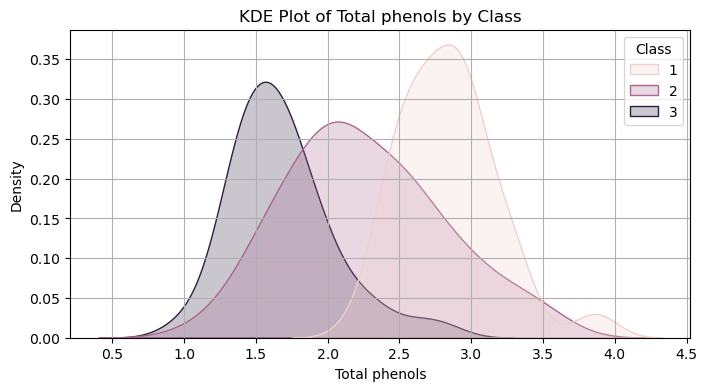

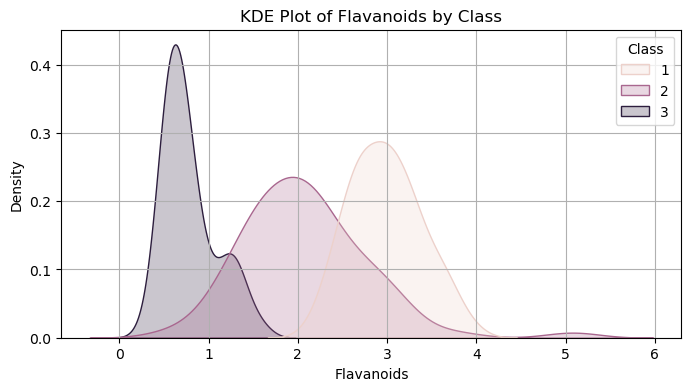

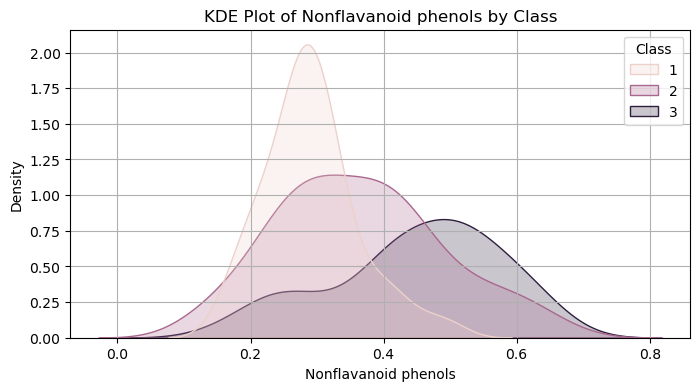

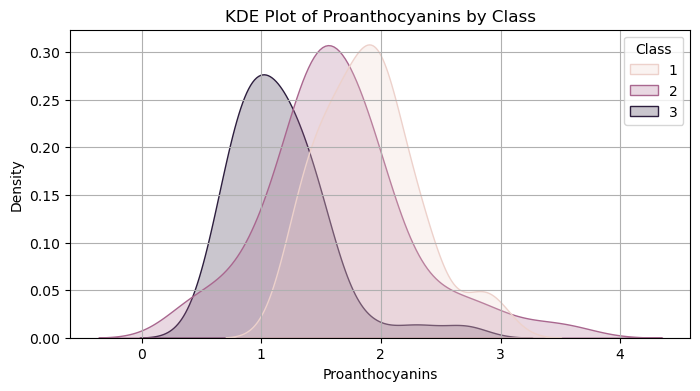

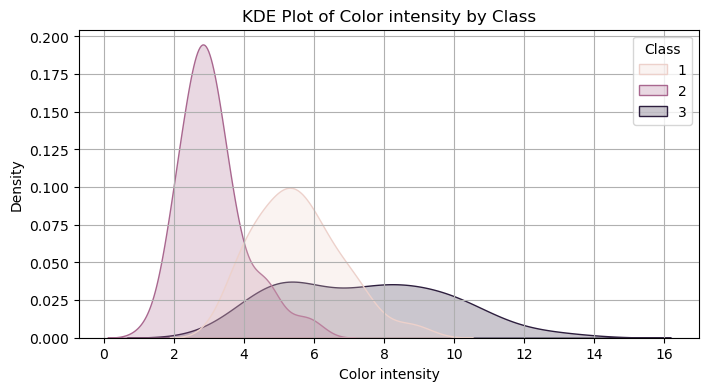

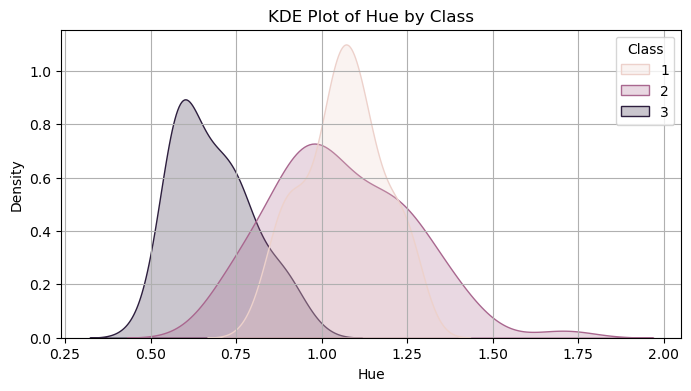

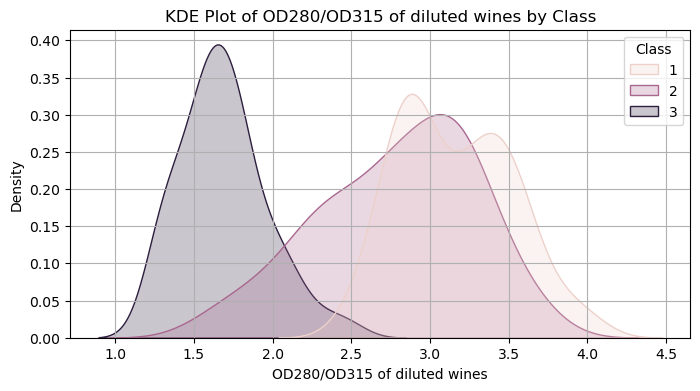

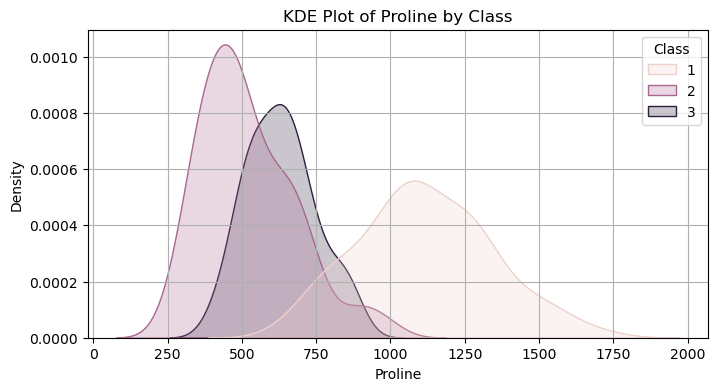

In [82]:
features_of_wine = wine_data.columns[1:]
for feature in features_of_wine:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=wine_data, x=feature, hue='Class', fill=True)  # I used this for plotting all feature vs class plots in order to 
    plt.title(f'KDE Plot of {feature} by Class')                    # observe the distribution of selected feature with respect to all classes
    plt.grid(True)
    plt.show()

In [100]:
# Scaling data with mean 0 variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2, stratify=Y) # Splitting data into 0.2 test , 0.8 train

## random_state is chosen as 2 since choosing it 1 or 42 caused accuracy to be 1 for all time. 

In [84]:
# By using knn library I created I imported knn_predict function
k_values = range(1, 31, 2) # I choose k from 1 to 29 with increasing rate of 2 for odd value of k
accuracy_results = {'euclidean': [], 'manhattan': []} 

for metric_type in ['euclidean', 'manhattan']:
    print(f"\nDistance metric: {metric_type}")
    for k in k_values:
        y_pred = knn.knn_predict(X_train, y_train, X_test, k=k, distance_metric=metric_type)
        acc = accuracy_score(y_test, y_pred) # For finding accuracy score I used built-in function of "sklearn.metrics" library
        accuracy_results[metric_type].append(acc)
        print(f"k = {k}, Accuracy = {acc:0.4f}")



Distance metric: euclidean
k = 1, Accuracy = 0.9167
k = 3, Accuracy = 0.9167
k = 5, Accuracy = 0.9722
k = 7, Accuracy = 0.9167
k = 9, Accuracy = 0.9167
k = 11, Accuracy = 0.9444
k = 13, Accuracy = 0.9444
k = 15, Accuracy = 0.9444
k = 17, Accuracy = 0.9167
k = 19, Accuracy = 0.9444
k = 21, Accuracy = 0.9722
k = 23, Accuracy = 0.9722
k = 25, Accuracy = 0.9444
k = 27, Accuracy = 0.9444
k = 29, Accuracy = 0.9722

Distance metric: manhattan
k = 1, Accuracy = 0.9444
k = 3, Accuracy = 0.9444
k = 5, Accuracy = 0.9722
k = 7, Accuracy = 0.9722
k = 9, Accuracy = 0.9722
k = 11, Accuracy = 0.9444
k = 13, Accuracy = 0.9444
k = 15, Accuracy = 0.9444
k = 17, Accuracy = 0.9444
k = 19, Accuracy = 0.9444
k = 21, Accuracy = 0.9444
k = 23, Accuracy = 0.9722
k = 25, Accuracy = 0.9722
k = 27, Accuracy = 0.9722
k = 29, Accuracy = 0.9722


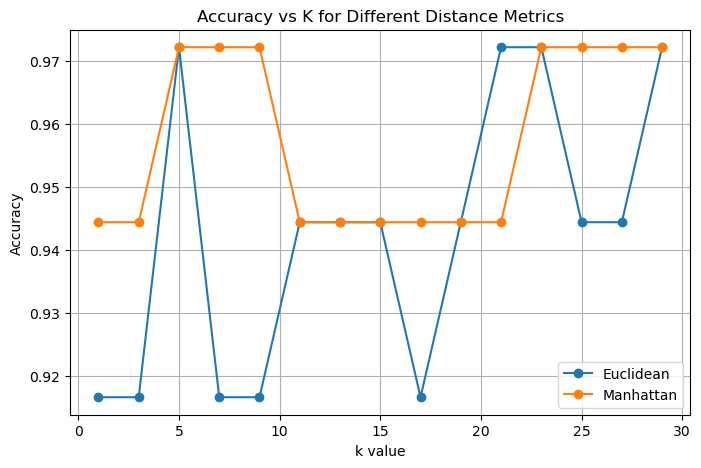

In [85]:
# Plotting Accuracy vs K
plt.figure(figsize=(8, 5)) # 8 to 5 is chosen randomly
for metric in accuracy_results:
    plt.plot(k_values, accuracy_results[metric], marker='o', label=f'{metric.capitalize()}')

plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K for Different Distance Metrics')
plt.legend() # I added legend similar to matlab
plt.grid(True)
plt.show()

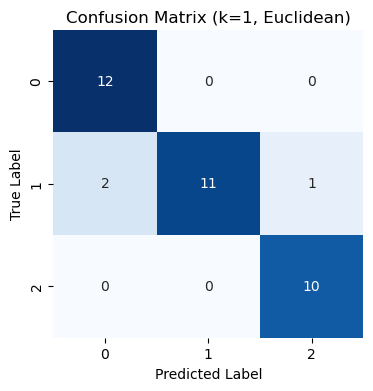


Classification Report (k=1, Euclidean):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.79      0.88        14
           3       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.91        36



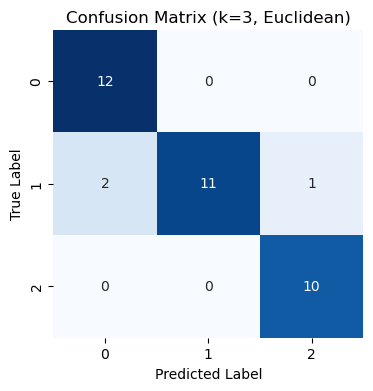


Classification Report (k=3, Euclidean):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.79      0.88        14
           3       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.91        36



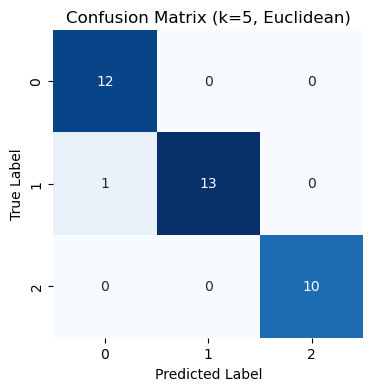


Classification Report (k=5, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



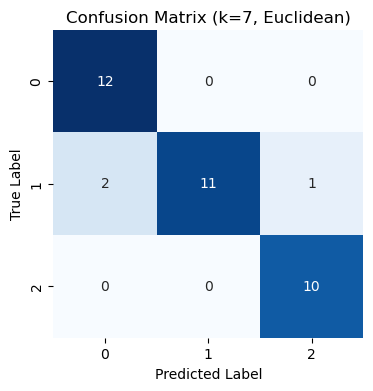


Classification Report (k=7, Euclidean):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.79      0.88        14
           3       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.91        36



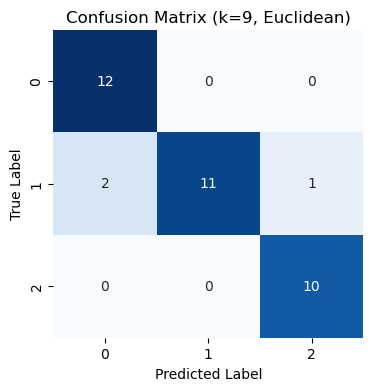


Classification Report (k=9, Euclidean):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.79      0.88        14
           3       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.91        36



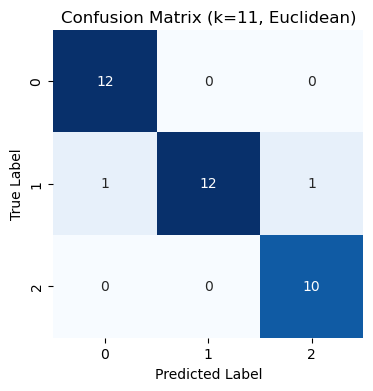


Classification Report (k=11, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92        14
           3       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



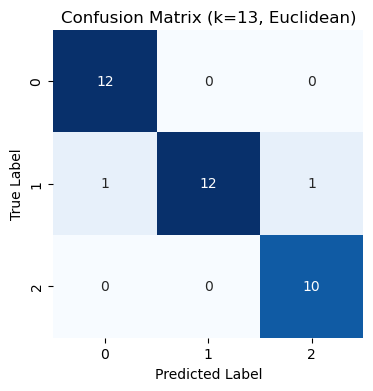


Classification Report (k=13, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92        14
           3       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



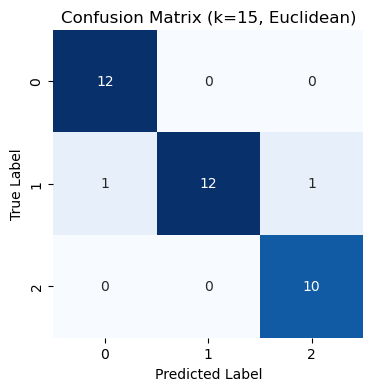


Classification Report (k=15, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92        14
           3       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



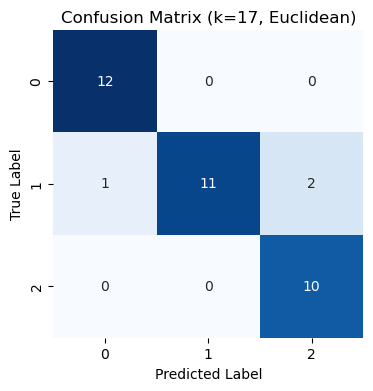


Classification Report (k=17, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.79      0.88        14
           3       0.83      1.00      0.91        10

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.91        36



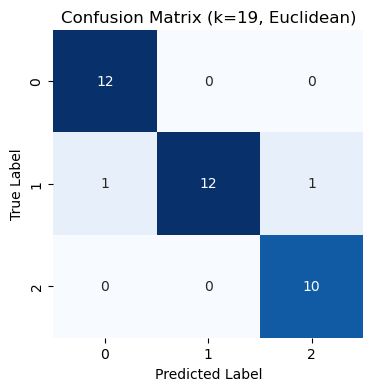


Classification Report (k=19, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92        14
           3       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



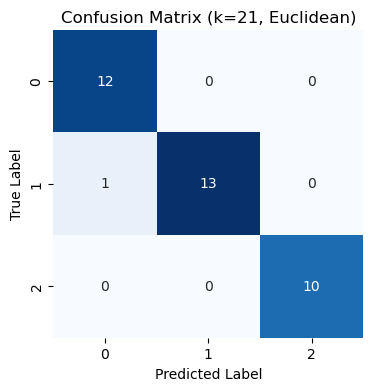


Classification Report (k=21, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



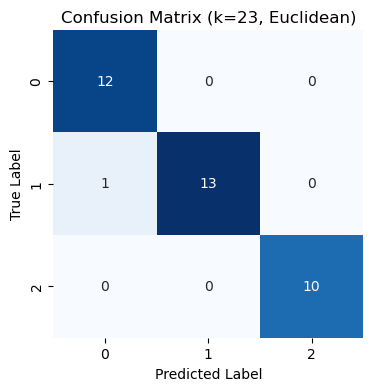


Classification Report (k=23, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



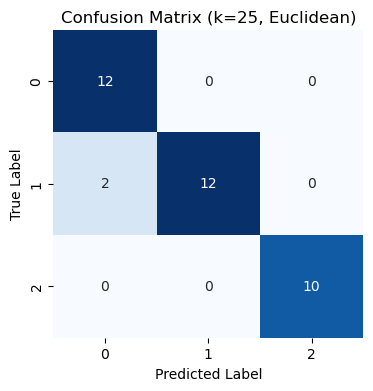


Classification Report (k=25, Euclidean):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



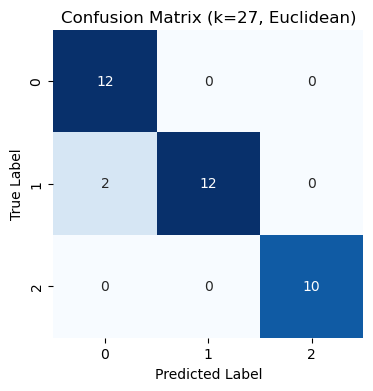


Classification Report (k=27, Euclidean):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



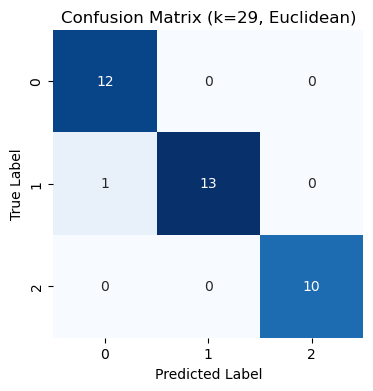


Classification Report (k=29, Euclidean):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



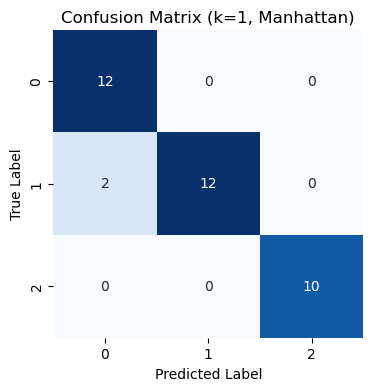


Classification Report (k=1, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



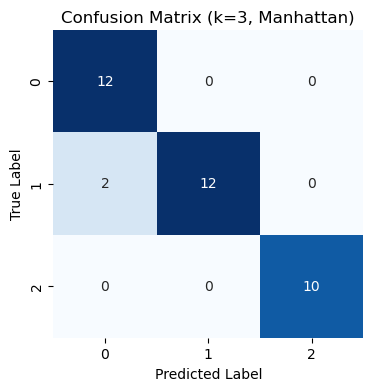


Classification Report (k=3, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



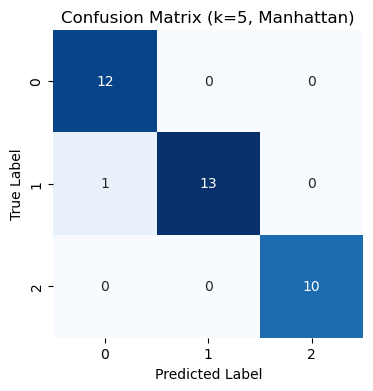


Classification Report (k=5, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



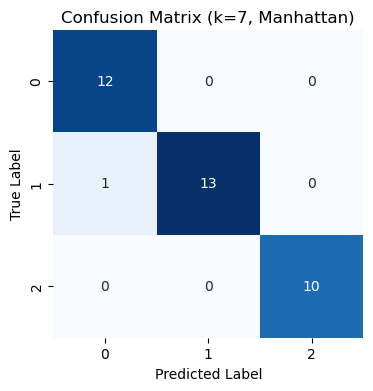


Classification Report (k=7, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



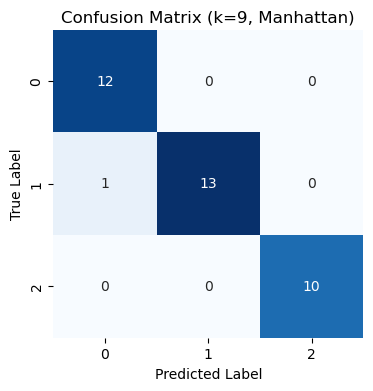


Classification Report (k=9, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



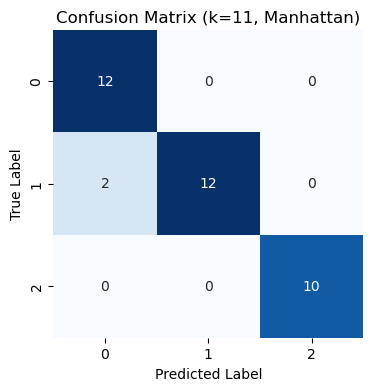


Classification Report (k=11, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



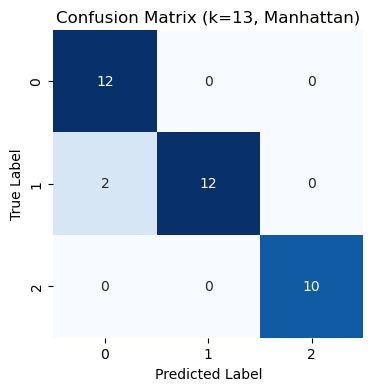


Classification Report (k=13, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



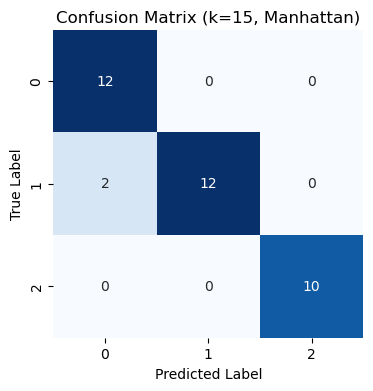


Classification Report (k=15, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



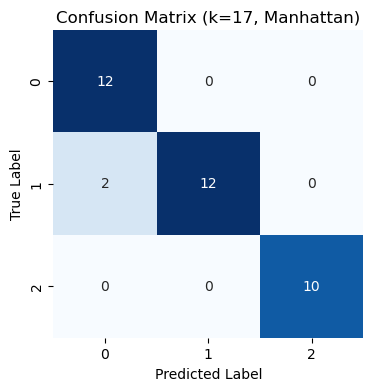


Classification Report (k=17, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



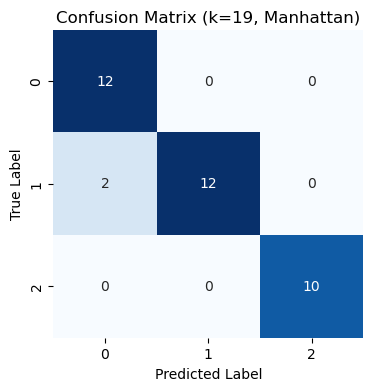


Classification Report (k=19, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



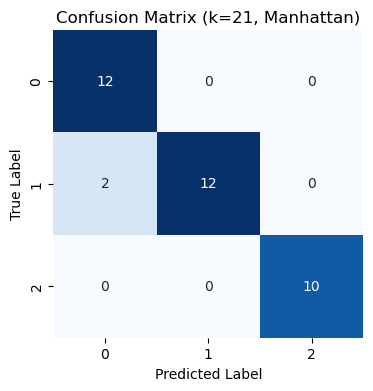


Classification Report (k=21, Manhattan):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



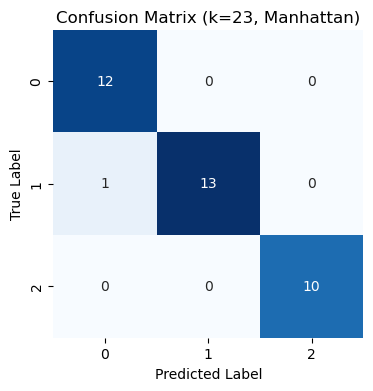


Classification Report (k=23, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



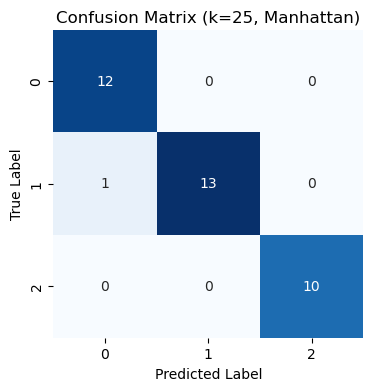


Classification Report (k=25, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



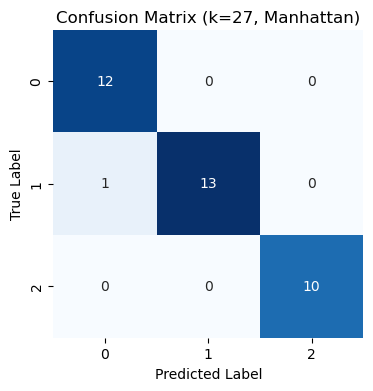


Classification Report (k=27, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



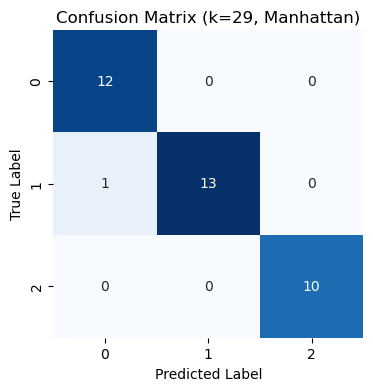


Classification Report (k=29, Manhattan):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [86]:
def show_confusion_and_classification(k_values, X_train, y_train, X_test, y_test):
    for distance in ['euclidean', 'manhattan']:
        for k in k_values:
            y_pred = knn.knn_predict(X_train, y_train, X_test, k=k, distance_metric=distance)

            # Plotting Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(4, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.title(f'Confusion Matrix (k={k}, {distance.capitalize()})')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()

            # Printing Classification Report
            print(f"\nClassification Report (k={k}, {distance.capitalize()}):")
            print(classification_report(y_test, y_pred,))

show_confusion_and_classification(k_values, X_train, y_train, X_test, y_test)

In [87]:
# With the help of artificial intelligence I changed this code and made it save images to a folder therefore I used " os " library
# The code is shown below as commented to prevent any errors.

In [88]:
#def plot_confusion_matrices(k_values, X_train, y_train, X_test, y_test):
#    os.makedirs("outputs", exist_ok=True) # Create directory if not exists
#
#    for distance in ['euclidean', 'manhattan']:
#        for k in k_values:
#            y_pred = knn.knn_predict(X_train, y_train, X_test, k=k, distance_metric=distance)
#
#            cm = confusion_matrix(y_test, y_pred)
#            report = classification_report(y_test, y_pred, digits=2)
#
#            # --- Start plotting ---
#            plt.figure(figsize=(6, 7))
#
#            # Confusion matrix heatmap
#            plt.subplot(2, 1, 1)
#            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#            plt.title(f'Confusion Matrix (k={k}, {distance.capitalize()})')
#           plt.xlabel('Predicted Label')
#            plt.ylabel('True Label')
#
#            # Classification report as text
#            plt.subplot(2, 1, 2)
#            plt.axis('off')
#            plt.text(0.01, 0.5, report, fontsize=10, family='monospace')
#
#            # Save combined figure
#            filename = f"outputs/confusion_report_k{k}_{distance}.png"
#            plt.savefig(filename)
#            plt.close()

In [91]:
# knn function that is written from stratch and imported in to original code is shown below:

In [92]:
import numpy as np
from collections import Counter

def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan(a, b):
    return np.sum(np.abs(a - b))

def knn_predict(X_train, Y_train, X_test, k=3, distance_metric='euclidean'):
    dist_func = euclidean if distance_metric == 'euclidean' else manhattan
    predictions = []

    for x in X_test:
        distances = [dist_func(x, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = [Y_train.iloc[i] for i in k_indices]
        predictions.append(Counter(k_labels).most_common(1)[0][0])

    return np.array(predictions)
print("knn.py works!") # I wrote a test code for knn


knn.py works!
